# Trabalho #2 - Classificação binária com TensorFlow Keras



## Coloque o seu nome e RA:

Aluno: Bruno Pinto de Oliveira

RA: 21.84712-4

Nesse trabalho será desenvolvido uma rede neural usando a plataforma TensorFlow-Keras, para realizar uma tarefa de classificação binária. O conjunto de dados utilizado é o " Red Wine Quality", que pode ser obtido no Kaggle no link (https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009).

Esse conjunto de dados contém características de diversos vinhos tintos e para cada um deles fornece uma pontuação de 0 a 10. Quanto maior a pontuação melhor é a qualidade do vinho. As características fornecidos dos vinhos descrevem algumas de suas propriedades relacionadas à  sua qualidade.

O intuito é somente classificar os vinhos como sendo bons ou ruins. Vamos considerar que um vinho é ruim se a sua pontuação for menor ou igual a 5 e que um vinho é bom se a sua pontuação for maior do que 5. Assim, você deve processar a coluna que fornece a qualidade dos vinhos de forma a criar duas classes: vinho ruim => classe 0 (nota <=5); vinho bom => classe 1 (nota >5). Após criar essas duas classes você deve remover dos dados a coluna com a pontuação dos vinhos.

Além de criar a saída desejada, será normalizadas as características que possuem intervalos de variação muito grandes. 

Ao término, apresenareie pelo menos os seguintes resultados:

1. Resultado do processo de treinamento (gráficos);

2. Valores da função de custo e da métrica para os dados de treinamento e teste (use o método evaluate);

3. Gráfico com as classes previstas junto com as classes reais dos dados de teste. Use círculos de cores diferentes para diferenciar as classe previstas das reais.

## Step 1

Importado bibliotecas que serão utilizada no trabalho vigente

In [305]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd                                  #biblioteca python que processa arquivos tabulados
from sklearn.model_selection import train_test_split #divide conjunto de dados
tf.__version__

'2.3.0'

## Step 2

Lendo arquivo .csv e atribuindo em 'df' (Data frame)

In [306]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Step 3

Apenas para verificação, foi impresso os tipos de dados dos elemento compostos em 'df'

In [307]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Step 4

Verificação se possui dados divergentes ou nulos no Data frame calculando estatísticas básicas dos dados numéricos

In [308]:
df.describe().T                                            

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## Step 5

Substituição do nome da coluna 'quality' por 'old_quality'. Posteriormente é adicionado uma coluna com o nome de 'quality' no Data frame. É verificado na coluna 'old_quality' os dados, se menor ou igual a 5, valor 1, caso não, valor 0. Essa matriz de 0 e 1 é atribuido a coluna 'quality'. Por fim, é retirado do Data frame a coluna 'old_quality' e impresso os 10 primeiro elemente da base de dados.

In [309]:
df = df.rename(columns={'quality': 'old_quality'})
df["quality"] = np.where(df.old_quality <= 5, 1, 0)
df = df.drop(columns=['old_quality'])
df.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,1


## Step 6

Criação dos dados de teste e dado de treinamento, sendo dividido em 80% de treinamento e 20% de teste. Como padrão, é realizado o embaralhamento pelo comando 'shuffle'.

In [310]:
train_df, test_df = train_test_split(df, test_size=0.2)

## Step 7

Atribuição dos dados de treinamento e teste da matriz de saída. O comando '.pop' permite retirar do Data frame a coluna 'quality', transforma-o em um vetor e atribuí em Y_train e Y_test.

In [311]:
Y_train = np.array(train_df.pop('quality')) 
Y_test = np.array(test_df.pop('quality'))

#não se pode fornecer um data frame (df) para a entrada da rede, por isso transfama-o em um tensor (array)

## Step 8

Apenas para verificação, foi impresso os 5 primeiros dados de treinamento 

In [312]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1141,8.2,0.380,0.32,2.50,0.080,24.0,71.0,0.99624,3.27,0.85,11.0
1421,7.5,0.400,0.18,1.60,0.079,24.0,58.0,0.99650,3.34,0.58,9.4
135,8.4,0.745,0.11,1.90,0.090,16.0,63.0,0.99650,3.19,0.82,9.6
441,11.9,0.400,0.65,2.15,0.068,7.0,27.0,0.99880,3.06,0.68,11.3
1230,7.7,0.180,0.34,2.70,0.066,15.0,58.0,0.99470,3.37,0.78,11.8


## Step 9

Normalização dos valores que possui alta taxa de variação. É de extrema importância inicializar a RNA com valores pequenos. Para todos os dados que possui alta variação, foi-se calculado a média e desvio padrão.

*DADOS DE TREINAMENTO*

In [313]:
mean_fixed_acidity = train_df['fixed acidity'].mean()                  #calcula media
std_fixed_acidity = train_df['fixed acidity'].std()                    #calcula desvio padrão

mean_residual_sugar = train_df['residual sugar'].mean()                #calcula media
std_residual_sugar = train_df['residual sugar'].std()                  #calcula desvio padrão

mean_free_sulfur_dioxide = train_df['free sulfur dioxide'].mean()      #calcula media
std_free_sulfur_dioxide = train_df['free sulfur dioxide'].std()        #calcula desvio padrão

mean_total_sulfur_dioxide = train_df['total sulfur dioxide'].mean()    #calcula media
std_total_sulfur_dioxide = train_df['total sulfur dioxide'].std()      #calcula desvio padrão

mean_alcohol = train_df['alcohol'].mean()                              #calcula media
std_alcohol = train_df['alcohol'].std()                                #calcula desvio padrão

## Step 10

Calculo de normalização, subtraindo os dado reais de treinamento pela média dos dados e subtraindo pelo desvio padrão.


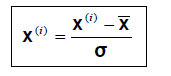

In [314]:
train_df['fixed acidity'] = (train_df['fixed acidity'] - mean_fixed_acidity)/std_fixed_acidity
train_df['residual sugar'] = (train_df['residual sugar'] - mean_residual_sugar)/std_residual_sugar
train_df['free sulfur dioxide'] = (train_df['free sulfur dioxide'] - mean_free_sulfur_dioxide)/std_free_sulfur_dioxide
train_df['total sulfur dioxide'] = (train_df['total sulfur dioxide'] - mean_total_sulfur_dioxide)/std_total_sulfur_dioxide
train_df['alcohol'] = (train_df['alcohol'] - mean_alcohol)/std_alcohol

<ipython-input-314-d7438a143774>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['fixed acidity'] = (train_df['fixed acidity'] - mean_fixed_acidity)/std_fixed_acidity
<ipython-input-314-d7438a143774>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['residual sugar'] = (train_df['residual sugar'] - mean_residual_sugar)/std_residual_sugar
<ipython-input-314-d7438a143774>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

## Step 11

Calculo de normalização, subtraindo os dado reais de treinamento pela média dos dados e subtraindo pelo desvio padrão. Porém desta vez, para os dados de teste.


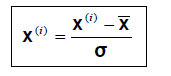

In [315]:
test_df['fixed acidity'] = (test_df['fixed acidity'] - mean_fixed_acidity)/std_fixed_acidity
test_df['residual sugar'] = (test_df['residual sugar'] - mean_residual_sugar)/std_residual_sugar
test_df['free sulfur dioxide'] = (test_df['free sulfur dioxide'] - mean_free_sulfur_dioxide)/std_free_sulfur_dioxide
test_df['total sulfur dioxide'] = (test_df['total sulfur dioxide'] - mean_total_sulfur_dioxide)/std_total_sulfur_dioxide
test_df['alcohol'] = (test_df['alcohol'] - mean_alcohol)/std_alcohol

<ipython-input-315-da0aee9b26e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['fixed acidity'] = (test_df['fixed acidity'] - mean_fixed_acidity)/std_fixed_acidity
<ipython-input-315-da0aee9b26e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['residual sugar'] = (test_df['residual sugar'] - mean_residual_sugar)/std_residual_sugar
<ipython-input-315-da0aee9b26e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

## Step 12

Verificação se possui erros e divergencias nos dados de treinamento. 'T' permite visualização transposta

In [316]:
train_df.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1279.0,-1.880044e-15,1.000000,-1.977894,-0.714696,-0.255351,0.548502,4.165842
volatile acidity,1279.0,5.259812e-01,0.178246,0.120000,0.390000,0.520000,0.635000,1.580000
citric acid,1279.0,2.727443e-01,0.195051,0.000000,0.095000,0.260000,0.425000,1.000000
residual sugar,1279.0,-1.965937e-15,1.000000,-1.141345,-0.451272,-0.244250,0.031779,8.933720
chlorides,1279.0,8.792338e-02,0.047526,0.012000,0.070000,0.080000,0.091000,0.611000
free sulfur dioxide,1279.0,4.826302e-17,1.000000,-1.427277,-0.855173,-0.187719,0.575086,4.961212
total sulfur dioxide,1279.0,-7.912184e-17,1.000000,-1.253827,-0.762980,-0.272132,0.494817,7.090580
density,1279.0,9.967857e-01,0.001921,0.990070,0.995600,0.996760,0.997900,1.003690
pH,1279.0,3.310884e+00,0.154356,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1279.0,6.590461e-01,0.172629,0.330000,0.550000,0.620000,0.730000,2.000000


## Step 13

Verificação se possui erros e divergencias nos dados de teste. 'T' permite visualização transposta

In [317]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,320.0,-0.071972,0.998006,-2.150148,-0.714696,-0.312769,0.433666,4.338097
volatile acidity,320.0,0.535172,0.182373,0.120000,0.393750,0.540000,0.640000,1.185000
citric acid,320.0,0.263906,0.193941,0.000000,0.087500,0.240000,0.420000,0.740000
residual sugar,320.0,-0.052216,0.856525,-1.141345,-0.451272,-0.244250,0.031779,7.484567
chlorides,320.0,0.085641,0.045203,0.012000,0.070750,0.078000,0.088000,0.467000
free sulfur dioxide,320.0,-0.044693,0.987592,-1.236576,-0.759823,-0.283070,0.479735,5.342615
total sulfur dioxide,320.0,-0.061748,1.045125,-1.253827,-0.801327,-0.364166,0.402783,7.428038
density,320.0,0.996591,0.001740,0.990070,0.995638,0.996605,0.997600,1.003150
pH,320.0,3.312031,0.154745,2.890000,3.210000,3.320000,3.410000,3.900000
sulphates,320.0,0.654563,0.156611,0.390000,0.550000,0.620000,0.730000,1.310000


## Step 14

Atribuição dos dados de entrada. X_train e X_test recebe o tensor numpy de train_df e test_df

In [318]:
#Dados de Entrada
X_train = np.array(train_df)
X_test = np.array(test_df)

## Step 15

Importação de bibliotecas que serão utilizadas para treinar a RNA.

In [319]:
#TREINAR A REDE, importando bibliotecas
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import initializers 

## Step 16

Apenas para verificação, impresso a dimensão da matriz X_train

In [320]:
print(X_train.shape)

(1279, 11)


## Step 17

x_dim é atribuido pela dimensão de shape disposta no 2°eixo (11 elementos), correspondente as características dos dados.

In [321]:
x_dim = X_train.shape[1]

## Step 18

Seleção do objeto de inicialização da Rede Neural e criado RNA com 3 camadas constituída de 64 neurônios da 1° camada (função 'relu'), 32 neurônios da 2° camada (função 'relu') e 1 neurônio na camada de saída (função 'sigmoid').

In [322]:
#Selecionando o inicializador, objeto de inicialização
inicial = initializers.GlorotNormal()


#Criando RNA
rna = Sequential()
rna.add(layers.Dense(64, activation = 'relu', kernel_initializer=inicial, input_dim=x_dim))
rna.add(layers.Dense(32, activation = 'relu', kernel_initializer=inicial))
rna.add(layers.Dense(1, activation = 'sigmoid', kernel_initializer=inicial))


rna.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_38 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 33        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


## Step 19

Compilação da RNA utilizando otimizador 'Adam', função de custo 'binary_crossentropy' e 'accuracy' (exatidão) como métrica. Para esta RNA foi realizado o treinamento em 1000 épocas.

In [323]:
#Compilando a RNA
rna.compile(optimizer = tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history = rna.fit(X_train, Y_train, epochs=1000, validation_data=(X_test, Y_test))

Epoch 1/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.6421 - accuracy: 0.6302 - val_loss: 0.5994 - val_accuracy: 0.7219
Epoch 2/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5669 - accuracy: 0.7170 - val_loss: 0.5654 - val_accuracy: 0.7375
Epoch 3/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.7248 - val_loss: 0.5545 - val_accuracy: 0.7375
Epoch 4/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.5398 - accuracy: 0.7240 - val_loss: 0.5489 - val_accuracy: 0.7344
Epoch 5/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.5325 - accuracy: 0.7357 - val_loss: 0.5471 - val_accuracy: 0.7375
Epoch 6/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5287 - accuracy: 0.7295 - val_loss: 0.5404 - val_accuracy: 0.7375
Epoch 7/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5239 - accuracy: 0.7342 - val_loss: 0.5372 - val_accuracy: 0.7469
Epoch 

Epoch 115/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8045 - val_loss: 0.5420 - val_accuracy: 0.7469
Epoch 116/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4045 - accuracy: 0.7959 - val_loss: 0.5231 - val_accuracy: 0.7656
Epoch 117/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8069 - val_loss: 0.5102 - val_accuracy: 0.7844
Epoch 118/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.8061 - val_loss: 0.5105 - val_accuracy: 0.7719
Epoch 119/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.3980 - accuracy: 0.8084 - val_loss: 0.5109 - val_accuracy: 0.7656
Epoch 120/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.3911 - accuracy: 0.8131 - val_loss: 0.5234 - val_accuracy: 0.7750
Epoch 121/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8100 - val_loss: 0.5233 - val_accuracy:

Epoch 228/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8514 - val_loss: 0.5618 - val_accuracy: 0.7688
Epoch 229/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8514 - val_loss: 0.5382 - val_accuracy: 0.7875
Epoch 230/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8546 - val_loss: 0.5402 - val_accuracy: 0.7875
Epoch 231/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3295 - accuracy: 0.8522 - val_loss: 0.5458 - val_accuracy: 0.7719
Epoch 232/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8624 - val_loss: 0.5332 - val_accuracy: 0.7625
Epoch 233/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8546 - val_loss: 0.5294 - val_accuracy: 0.7844
Epoch 234/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8554 - val_loss: 0.5398 - val_accuracy:

Epoch 285/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2939 - accuracy: 0.8733 - val_loss: 0.5765 - val_accuracy: 0.7625
Epoch 286/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.2948 - accuracy: 0.8726 - val_loss: 0.5658 - val_accuracy: 0.7719
Epoch 287/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2929 - accuracy: 0.8788 - val_loss: 0.5557 - val_accuracy: 0.7812
Epoch 288/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2937 - accuracy: 0.8726 - val_loss: 0.5703 - val_accuracy: 0.7719
Epoch 289/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2989 - accuracy: 0.8733 - val_loss: 0.5921 - val_accuracy: 0.7656
Epoch 290/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.3020 - accuracy: 0.8733 - val_loss: 0.5718 - val_accuracy: 0.7781
Epoch 291/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2946 - accuracy: 0.8702 - val_loss: 0.5777 - val_accuracy:

Epoch 342/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2747 - accuracy: 0.8905 - val_loss: 0.6228 - val_accuracy: 0.7844
Epoch 343/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2767 - accuracy: 0.8835 - val_loss: 0.6154 - val_accuracy: 0.7719
Epoch 344/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2643 - accuracy: 0.8890 - val_loss: 0.5881 - val_accuracy: 0.7781
Epoch 345/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2681 - accuracy: 0.8952 - val_loss: 0.6080 - val_accuracy: 0.7937
Epoch 346/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2679 - accuracy: 0.8921 - val_loss: 0.5984 - val_accuracy: 0.7781
Epoch 347/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.8874 - val_loss: 0.6365 - val_accuracy: 0.7656
Epoch 348/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2671 - accuracy: 0.8937 - val_loss: 0.6365 - val_accuracy:

Epoch 455/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2254 - accuracy: 0.9163 - val_loss: 0.7052 - val_accuracy: 0.7719
Epoch 456/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2177 - accuracy: 0.9132 - val_loss: 0.6901 - val_accuracy: 0.7750
Epoch 457/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2240 - accuracy: 0.9070 - val_loss: 0.6966 - val_accuracy: 0.7812
Epoch 458/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2189 - accuracy: 0.9171 - val_loss: 0.7121 - val_accuracy: 0.7969
Epoch 459/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2290 - accuracy: 0.9077 - val_loss: 0.7203 - val_accuracy: 0.7719
Epoch 460/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2183 - accuracy: 0.9156 - val_loss: 0.7132 - val_accuracy: 0.7656
Epoch 461/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2136 - accuracy: 0.9249 - val_loss: 0.7271 - val_accuracy:

Epoch 512/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2042 - accuracy: 0.9187 - val_loss: 0.7595 - val_accuracy: 0.7844
Epoch 513/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2169 - accuracy: 0.9101 - val_loss: 0.7537 - val_accuracy: 0.7812
Epoch 514/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2103 - accuracy: 0.9156 - val_loss: 0.7240 - val_accuracy: 0.7781
Epoch 515/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2004 - accuracy: 0.9265 - val_loss: 0.7602 - val_accuracy: 0.7750
Epoch 516/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1976 - accuracy: 0.9242 - val_loss: 0.7711 - val_accuracy: 0.7625
Epoch 517/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2019 - accuracy: 0.9179 - val_loss: 0.7414 - val_accuracy: 0.7750
Epoch 518/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1987 - accuracy: 0.9320 - val_loss: 0.7790 - val_accuracy:

Epoch 569/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1894 - accuracy: 0.9320 - val_loss: 0.7942 - val_accuracy: 0.7906
Epoch 570/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1942 - accuracy: 0.9234 - val_loss: 0.7931 - val_accuracy: 0.7812
Epoch 571/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.2089 - accuracy: 0.9109 - val_loss: 0.8239 - val_accuracy: 0.7688
Epoch 572/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1884 - accuracy: 0.9265 - val_loss: 0.8151 - val_accuracy: 0.7750
Epoch 573/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1895 - accuracy: 0.9320 - val_loss: 0.8066 - val_accuracy: 0.7844
Epoch 574/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1903 - accuracy: 0.9273 - val_loss: 0.8387 - val_accuracy: 0.7781
Epoch 575/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1861 - accuracy: 0.9257 - val_loss: 0.8057 - val_accuracy:

Epoch 626/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1750 - accuracy: 0.9257 - val_loss: 0.8597 - val_accuracy: 0.7875
Epoch 627/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1650 - accuracy: 0.9421 - val_loss: 0.8929 - val_accuracy: 0.7531
Epoch 628/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1853 - accuracy: 0.9281 - val_loss: 0.9147 - val_accuracy: 0.7750
Epoch 629/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1710 - accuracy: 0.9312 - val_loss: 0.8850 - val_accuracy: 0.7875
Epoch 630/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1754 - accuracy: 0.9335 - val_loss: 0.8823 - val_accuracy: 0.7812
Epoch 631/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1653 - accuracy: 0.9429 - val_loss: 0.9013 - val_accuracy: 0.7688
Epoch 632/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.1713 - accuracy: 0.9320 - val_loss: 0.8820 - val_accuracy:

Epoch 683/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9398 - val_loss: 0.9239 - val_accuracy: 0.7844
Epoch 684/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1511 - accuracy: 0.9468 - val_loss: 0.9361 - val_accuracy: 0.7656
Epoch 685/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1534 - accuracy: 0.9390 - val_loss: 0.9213 - val_accuracy: 0.7844
Epoch 686/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9390 - val_loss: 0.8766 - val_accuracy: 0.7906
Epoch 687/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9398 - val_loss: 0.9336 - val_accuracy: 0.7750
Epoch 688/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1539 - accuracy: 0.9445 - val_loss: 0.9291 - val_accuracy: 0.7594
Epoch 689/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9406 - val_loss: 0.9550 - val_accuracy:

Epoch 740/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1437 - accuracy: 0.9461 - val_loss: 0.9979 - val_accuracy: 0.7594
Epoch 741/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1488 - accuracy: 0.9414 - val_loss: 0.9841 - val_accuracy: 0.7688
Epoch 742/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1420 - accuracy: 0.9507 - val_loss: 0.9504 - val_accuracy: 0.7875
Epoch 743/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1487 - accuracy: 0.9445 - val_loss: 0.9561 - val_accuracy: 0.7719
Epoch 744/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1451 - accuracy: 0.9500 - val_loss: 0.9716 - val_accuracy: 0.7625
Epoch 745/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1466 - accuracy: 0.9437 - val_loss: 0.9717 - val_accuracy: 0.7719
Epoch 746/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1445 - accuracy: 0.9429 - val_loss: 0.9740 - val_accuracy:

Epoch 797/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1289 - accuracy: 0.9554 - val_loss: 1.0960 - val_accuracy: 0.7688
Epoch 798/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1245 - accuracy: 0.9562 - val_loss: 1.1075 - val_accuracy: 0.7750
Epoch 799/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1319 - accuracy: 0.9507 - val_loss: 1.0699 - val_accuracy: 0.7750
Epoch 800/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1320 - accuracy: 0.9523 - val_loss: 1.0705 - val_accuracy: 0.7750
Epoch 801/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1273 - accuracy: 0.9554 - val_loss: 1.0586 - val_accuracy: 0.7750
Epoch 802/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1285 - accuracy: 0.9562 - val_loss: 1.0828 - val_accuracy: 0.7688
Epoch 803/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1341 - accuracy: 0.9515 - val_loss: 1.0567 - val_accuracy:

Epoch 854/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1191 - accuracy: 0.9593 - val_loss: 1.1368 - val_accuracy: 0.7563
Epoch 855/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1220 - accuracy: 0.9578 - val_loss: 1.1362 - val_accuracy: 0.7656
Epoch 856/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1179 - accuracy: 0.9547 - val_loss: 1.1279 - val_accuracy: 0.7531
Epoch 857/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1197 - accuracy: 0.9601 - val_loss: 1.1122 - val_accuracy: 0.7625
Epoch 858/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.9586 - val_loss: 1.1045 - val_accuracy: 0.7656
Epoch 859/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1167 - accuracy: 0.9664 - val_loss: 1.1242 - val_accuracy: 0.7688
Epoch 860/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1184 - accuracy: 0.9593 - val_loss: 1.1427 - val_accuracy:

Epoch 967/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1105 - accuracy: 0.9625 - val_loss: 1.3455 - val_accuracy: 0.7656
Epoch 968/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1156 - accuracy: 0.9578 - val_loss: 1.3768 - val_accuracy: 0.7500
Epoch 969/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1159 - accuracy: 0.9617 - val_loss: 1.2319 - val_accuracy: 0.7688
Epoch 970/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1670 - accuracy: 0.9554 - val_loss: 1.3616 - val_accuracy: 0.7719
Epoch 971/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.1244 - accuracy: 0.9593 - val_loss: 1.5189 - val_accuracy: 0.7563
Epoch 972/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1308 - accuracy: 0.9500 - val_loss: 1.3792 - val_accuracy: 0.7500
Epoch 973/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0988 - accuracy: 0.9711 - val_loss: 1.3400 - val_accuracy:

## Step 20

Plotagem dos gráficos da função de custo/exatidão x épocas

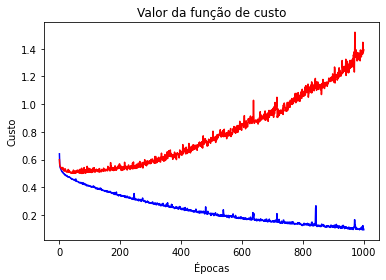

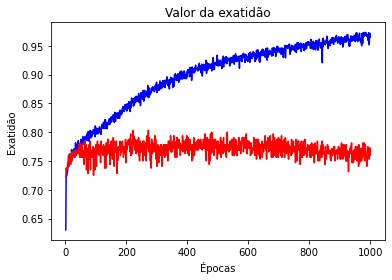

In [324]:
#fazer gráfico
# Recupera hostorico do treinamento
history_dict = history.history

# Salva custo e exatidão em vetores
custo = history_dict['loss']
exatidao = history_dict['accuracy']
val_custo = history_dict['val_loss']
val_exatidao = history_dict['val_accuracy']

# Cria vetor de épocas
epocas = range(1, len(custo) + 1)

# Gráfico do custo em funçaõ das épocas
plt.plot(epocas, custo, 'b', label='Dados treinamento')
plt.plot(epocas, val_custo, 'r', label='Dados validação')
plt.title('Valor da função de custo')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

# Gráfico da exatidão em função das épocas
plt.plot(epocas, exatidao, 'b', label='Dados treinamento')
plt.plot(epocas, val_exatidao, 'r', label='Dadosvalidação')
plt.title('Valor da exatidão')
plt.xlabel('Épocas')
plt.ylabel('Exatidão')
plt.show()



## Step 21

Avaliação da RNA. O comando '.evaluate' permite avaliar a RNA para os dados de treinamento (X_train, Y_train) e teste (X_test, Y_test).

In [325]:
#avaliar os dados
cm_train = rna.evaluate(X_train, Y_train)
cm_test = rna.evaluate(X_test, Y_test)


10/10 [==============================] - 0s 2ms/step - loss: 1.3915 - accuracy: 0.7719


## Step 22

Calculo da previsão da RNA pela função '.predict' e impressão dos dados reais x previstos.

In [326]:
# Cálculo das classes previstas
y_prev = rna.predict(X_test)
classes = np.round(y_prev)

<function matplotlib.pyplot.show(close=None, block=None)>

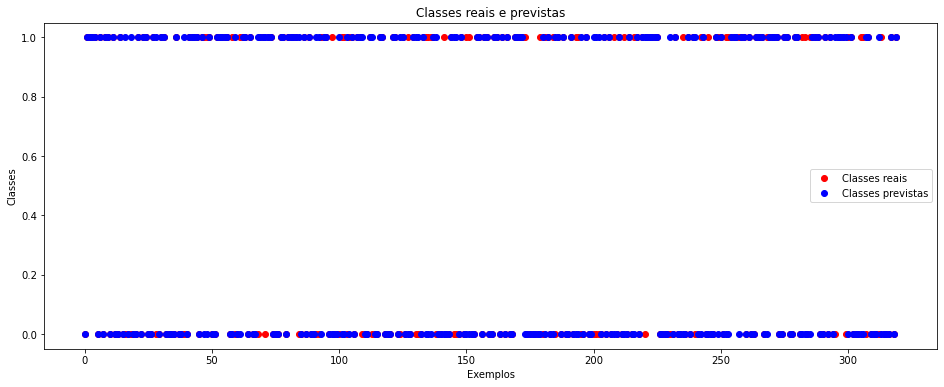

In [327]:
# Gráfico das classes reais e previstas
plt.figure(figsize=(16, 6))
plt.plot(Y_test, 'ro', label='Classes reais')
plt.plot(classes, 'bo', label='Classes previstas')
plt.title('Classes reais e previstas')
plt.xlabel('Exemplos')
plt.ylabel('Classes')
plt.legend()
plt.show

## Step 23

Verificação da previsão. Y_test[1:5] mostra a saída real dos primeiros 5 elementos do Data frame. 
previsao = rna.predict(X_test[1:5])calcula a previsão de saída desses mesmos dados e realiza a impressão.

In [328]:
Y_test[1:5]

array([1, 1, 1, 1])

In [329]:
previsao = rna.predict(X_test[1:5])
previsao

array([[0.9999223 ],
       [0.99816585],
       [0.9959339 ],
       [0.9780502 ]], dtype=float32)